# Background: we have screenshots that have a lot of unwanted/unrequired data the we want to get rid of. The data we need is basically a rectangular area with black background.

## In this code we are extracting that ractangle ROI(Region of Intrest) out of the screenshots. 

In [129]:
#import the required libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [138]:
#read the image into the python code to manipulate
img =cv2.imread('3.png')


img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
#im_ycrcb = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)

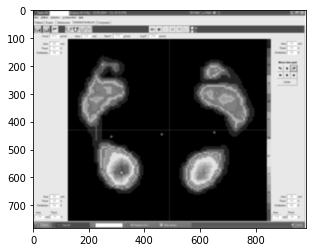

In [139]:
#plot and check if the image has been loaded correctly
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')

0.0
125 103 715 655


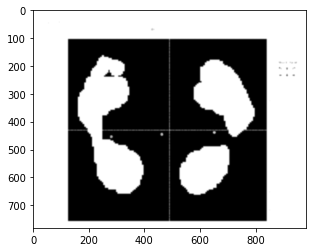

In [249]:

ret,thresh = cv2.threshold(img_gray,0,255,cv2.THRESH_BINARY)
print(ret)

IMAGE,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,  cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[30] 


#plot and check if the image has been loaded correctly
plt.imshow(IMAGE, cmap = 'gray', interpolation = 'bicubic')

x,y,w,h = cv2.boundingRect(cnt)
print(x,y,w,h)

#cv2.rectangle(img_gray, (x, y), (x+w, y+h), (255,0,0), 2)

489 750 2 4


In [244]:
cropped_img = img[y:y+h, x:x+w]

In [245]:
#write the required part of image as a seprate image after the extraction 
cv2.imwrite('cropped_img.jpg',cropped_img)

True